In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data_ = datasets.make_moons(100)

In [3]:
data_

(array([[-8.38088105e-01,  5.45534901e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 6.72300890e-01,  7.40277997e-01],
        [ 9.91790014e-01,  1.27877162e-01],
        [-9.00968868e-01,  4.33883739e-01],
        [ 1.90096887e+00,  6.61162609e-02],
        [ 1.46253829e+00, -3.86599306e-01],
        [-9.60230259e-02,  9.95379113e-01],
        [ 7.18349350e-01,  6.95682551e-01],
        [ 1.87131870e+00,  9.28244800e-03],
        [ 1.57211666e+00, -3.20172255e-01],
        [-1.00000000e+00,  1.22464680e-16],
        [ 8.01413622e-01,  5.98110530e-01],
        [ 8.20998618e-03,  3.72122838e-01],
        [ 1.03205158e+00, -4.99486216e-01],
        [ 4.27883340e-01, -3.20172255e-01],
        [ 1.62348980e+00, -2.81831482e-01],
        [-9.97945393e-01,  6.40702200e-02],
        [-9.67294863e-01,  2.53654584e-01],
        [-9.91790014e-01,  1.27877162e-01],
        [ 1.99794539e+00,  4.35929780e-01],
        [-5.18392568e-01,  8.55142763e-01],
        [ 1.59599895e-01,  9.871

In [5]:
inputData = pd.DataFrame(data = data_[0])

In [6]:
inputData.head()

,0,1
0,-0.838088,0.545535
1,1.000000,0.000000
2,0.672301,0.740278
3,0.991790,0.127877
4,-0.900969,0.433884


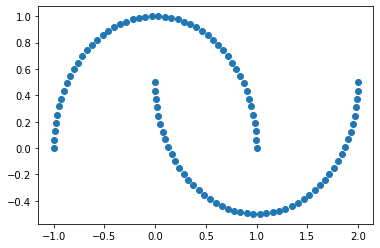

In [7]:
plt.scatter(inputData[0], inputData[1])

In [8]:
outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,0
1,0
2,0
3,0
4,0


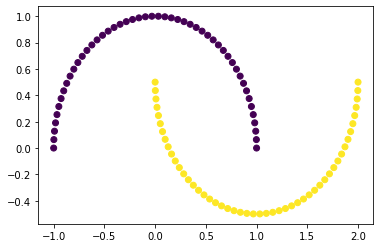

In [9]:
plt.scatter(inputData[0], inputData[1], c = outputData)

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7)   #silhouette_score is more for cluster value n=7 & 8
model.fit(inputData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
model.labels_

array([3, 1, 1, 1, 3, 2, 5, 6, 1, 2, 5, 3, 1, 0, 5, 4, 5, 3, 3, 3, 2, 3,
       6, 0, 1, 4, 2, 0, 2, 4, 5, 1, 3, 3, 0, 2, 6, 6, 6, 4, 6, 1, 1, 6,
       0, 6, 1, 6, 0, 2, 6, 5, 3, 5, 4, 4, 0, 3, 4, 5, 6, 1, 5, 0, 6, 1,
       6, 3, 2, 2, 3, 2, 4, 4, 4, 3, 1, 4, 0, 4, 6, 5, 6, 3, 3, 5, 3, 0,
       3, 2, 6, 0, 4, 0, 6, 1, 2, 5, 5, 1], dtype=int32)

In [12]:
from sklearn import metrics

In [13]:
metrics.silhouette_score(inputData, model.labels_)

0.5099160314454811

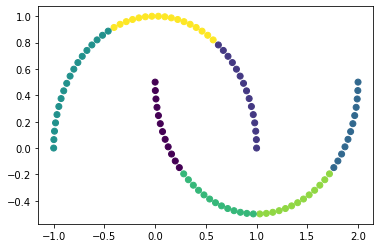

In [15]:
plt.scatter(inputData[0], inputData[1], c = model.labels_)

In [16]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

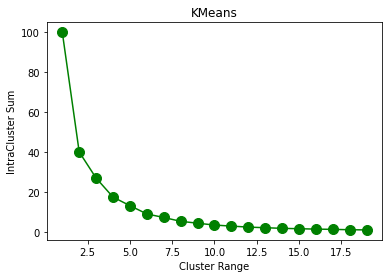

In [17]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()